In [1]:
# codes up the multi-armed bandit problem using epsilon exploration

In [1]:
%matplotlib notebook
import numpy as np
import pdb
from matplotlib import pyplot as plt
from Bandit import Bandit

In [85]:
def run_experiment(true_means,N,eps):
    """
    Making a function so that it can be run repeatedly with different settings
    """
    bandits = []
    for tm in true_means:
        bandits.extend([Bandit(tm)])
    data = np.empty(N)
    est_means = [b.est_mean for b in bandits]
    for pix in range(N):
        p = np.random.random()
        if p<eps: # if you fall in the explore range
            j = np.random.choice(3) # choose 1 out of 3 slot machines , note choosing equally, 
                                    # and not excluding our 'best'
        else:
            j = np.argmax(est_means)
        pull_result = bandits[j].pull()
        bandits[j].update(pull_result)
        data[pix] = pull_result

    cumulative_average = np.cumsum(data)/(np.arange(N)+1) # see how the average reward has fluctuated
    plt.figure()
    plt.plot(cumulative_average)
    for tm in true_means:
        plt.plot(np.ones(N)*tm,c='orange')
        plt.annotate(str(tm),xy=(0,tm))
    for b in bandits:
        plt.plot(np.ones(N)*b.est_mean,c='blue')
        plt.annotate(str(b.est_mean),xy=(N-1,b.est_mean))
        
#     plt.xscale('log')
    plt.title('eps='+str(eps))

    plt.show()
    
    return cumulative_average # will serve as a test of how quickly you get to the optimal
    




<IPython.core.display.Javascript object>


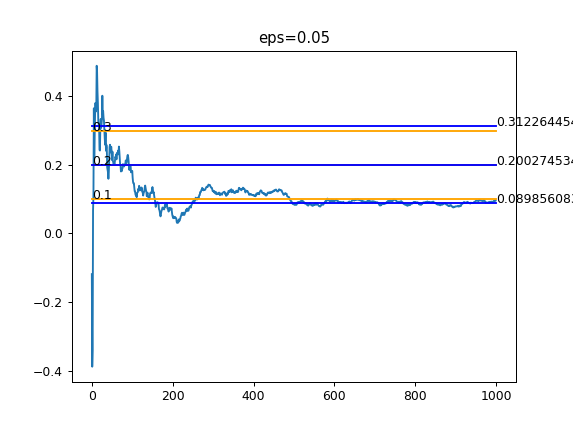

<IPython.core.display.Javascript object>


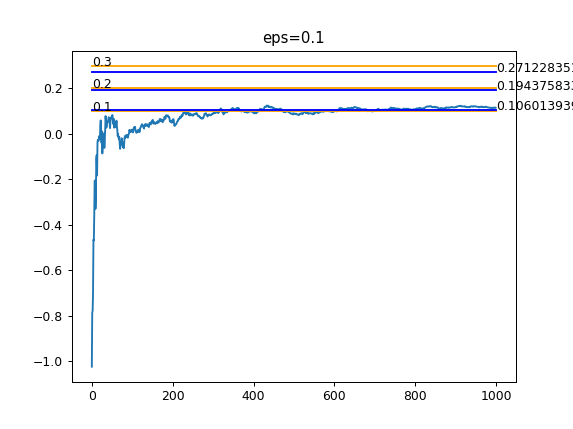

<IPython.core.display.Javascript object>


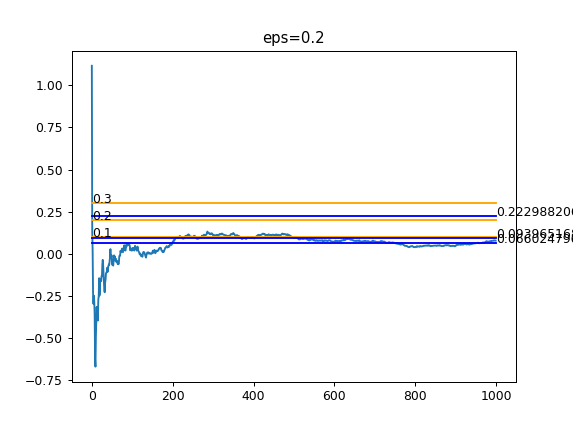

In [87]:
true_means = [0.1,0.3,0.2]
N = 1000 # number of pulls to get estimate of the means
results = []
eps = [0.05,0.1,0.2]
for e in eps:
    results.extend([run_experiment(true_means,N,e)])

<IPython.core.display.Javascript object>


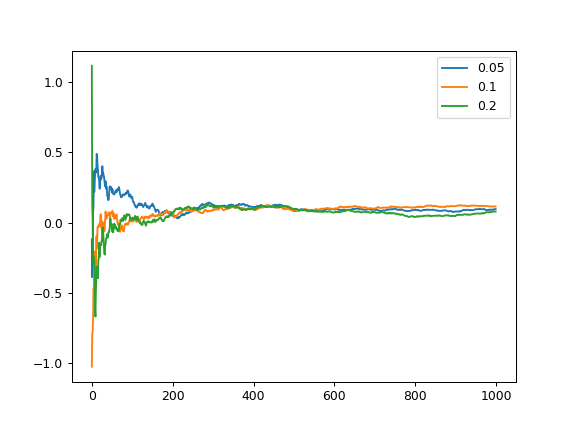

In [88]:
plt.figure()
for e,r in zip(eps,results):
    plt.plot(r,label=str(e))
plt.legend()
